In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.rcParams['figure.figsize'] = (10, 5)

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
# Loading autocorrelation ACF,PACF,plots, and seasonal decompose

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score

In [4]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
#import dataset
data = pd.read_csv('data/MSFT_Stock.csv')

In [8]:
data.head()

,Unnamed: 0,open,high,low,close,volume
0,2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
1,2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2,2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
3,2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
4,2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [9]:
#Change columns name
data.rename(columns = {'Unnamed: 0':'date'}, inplace=True)

In [10]:
data

,date,open,high,low,close,volume
0,2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
1,2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2,2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
3,2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
4,2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200
...,...,...,...,...,...,...
4995,2021-01-25,229.12000,229.78000,224.22000,229.53000,33152095
4996,2021-01-26,231.86000,234.17999,230.08000,232.33000,48699200
4997,2021-01-27,238.00000,240.44000,230.14000,232.89999,69757500
4998,2021-01-28,235.61000,242.64000,235.09000,238.92999,48990000


In [11]:
data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [12]:
#Change date data type
data['date'] = pd.to_datetime(data.date)

In [13]:
data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

In [14]:
data = data.sort_values('date')
data.head()

,date,open,high,low,close,volume
0,2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
1,2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2,2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
3,2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
4,2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [15]:
# Set date as an index
data.set_index('date', inplace=True, drop=True)
data.head()

,open,high,low,close,volume
date,,,,,
2001-03-16,26.25000,27.56250,26.24219,27.28125,112848800
2001-03-19,27.25000,27.75000,26.56250,27.15625,61036400
2001-03-20,27.28125,28.06250,26.31250,26.34375,91822800
2001-03-21,26.12500,26.62500,24.87500,25.03125,124988600
2001-03-22,25.28125,27.03125,25.25000,27.00000,126363200


In [16]:
data.index[:20]

DatetimeIndex(['2001-03-16', '2001-03-19', '2001-03-20', '2001-03-21',
               '2001-03-22', '2001-03-23', '2001-03-26', '2001-03-27',
               '2001-03-28', '2001-03-29', '2001-03-30', '2001-04-02',
               '2001-04-03', '2001-04-04', '2001-04-05', '2001-04-06',
               '2001-04-09', '2001-04-10', '2001-04-11', '2001-04-12'],
              dtype='datetime64[ns]', name='date', freq=None)

In [171]:
subset_df = data[['close']]

In [172]:
subset_df=subset_df.resample('M').mean()

In [173]:
subset_df.head()

,close
date,
2001-03-31,27.369318
2001-04-30,31.183562
2001-05-31,34.886364
2001-06-30,35.307381
2001-07-31,34.178810


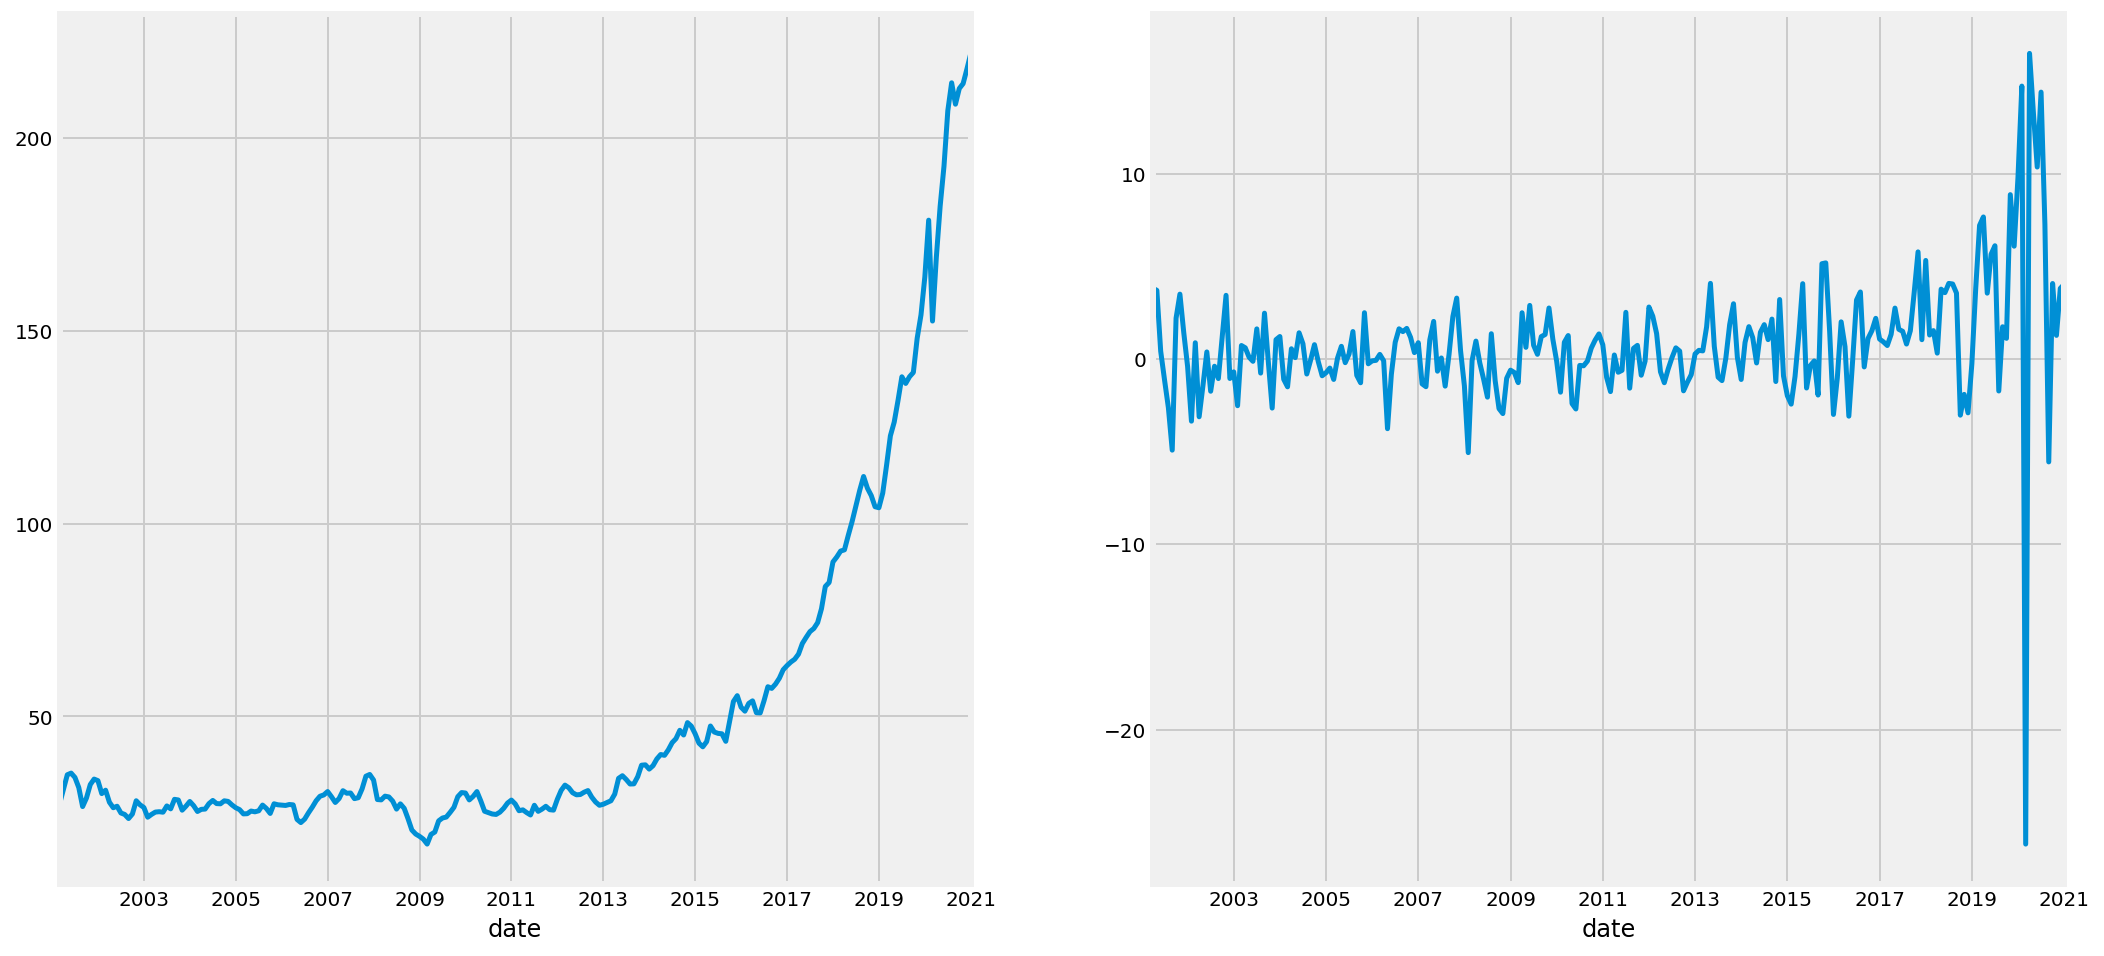

In [174]:
fig,ax=plt.subplots(ncols=2,figsize=(16,8))

subset_df['close'].plot(lw=2.5, ax=ax[0])
subset_df['close'].diff().dropna().plot(lw=2.5, ax=ax[1]);

In [175]:
adf_test(data['close'])

Augmented Dickey-Fuller Test: 
ADF test statistic         6.270396
p-value                    1.000000
# lags used               29.000000
# observations          4970.000000
critical value (1%)       -3.431666
critical value (5%)       -2.862122
critical value (10%)      -2.567080
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


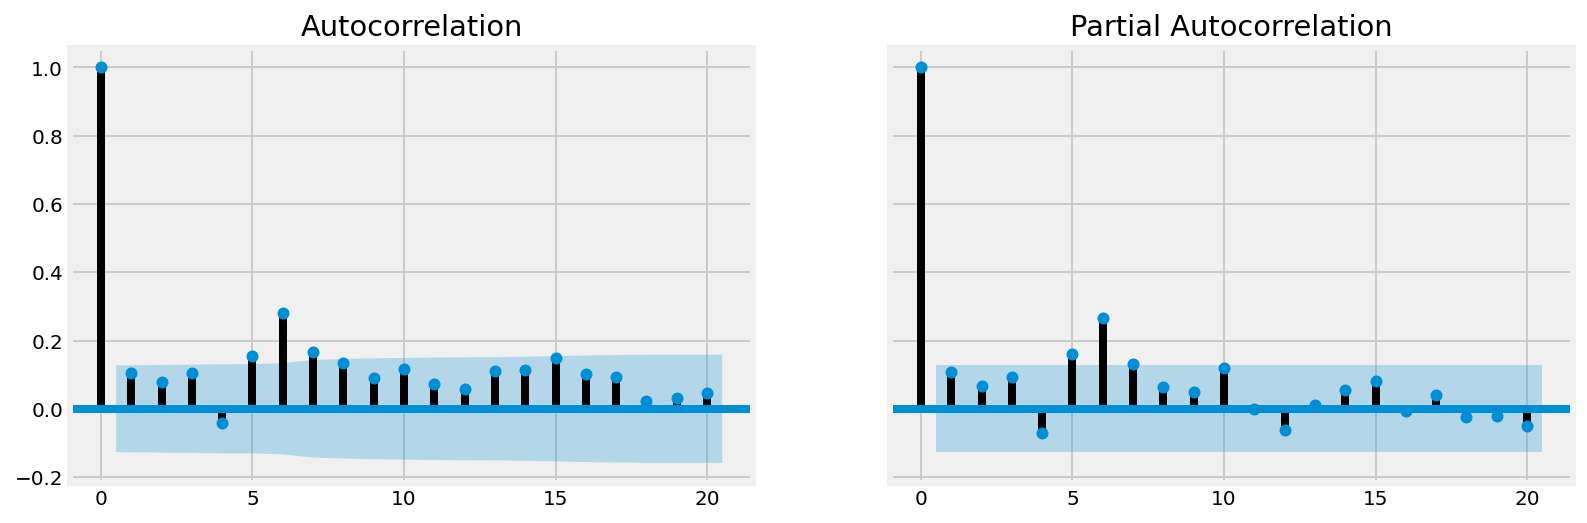

In [176]:
autocorr_plots(subset_df['close'].diff().dropna(), lags=20);

## Create Autoregressive Model (AR) 
---

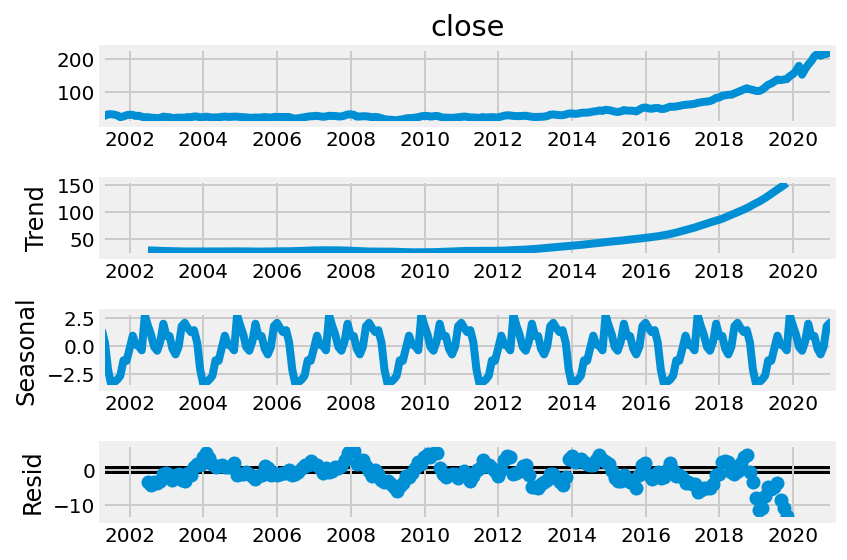

In [178]:
result = seasonal_decompose(subset_df['close'],freq=30)
result.plot();

In [180]:
# Create train/test datasets
df_train = subset_df.loc[:'2019']
df_test = subset_df.loc['2019':]

In [181]:
df_train.shape , df_test.shape

((226, 1), (25, 1))

In [182]:
#train the autoregression model
model = AR(df_train)
model_fitted = model.fit()

In [184]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const       -1.385046
L1.close     1.299380
L2.close    -0.433981
L3.close    -0.012265
L4.close     0.141999
L5.close    -0.021324
L6.close    -0.039019
L7.close     0.000744
L8.close     0.173064
L9.close    -0.166706
L10.close    0.178062
L11.close   -0.215327
L12.close    0.067881
L13.close    0.041183
L14.close   -0.034860
L15.close    0.076111
dtype: float64


In [185]:
# Make predictions 
predictions = model_fitted.predict(
    start=len(df_train),
    end=len(df_train) + len(df_test)-1,
    dynamic=False)

In [186]:
predictions

2020-01-31    158.984339
2020-02-29    163.072034
2020-03-31    166.921604
2020-04-30    170.312105
2020-05-31    174.258768
2020-06-30    177.206608
2020-07-31    182.695867
2020-08-31    188.350714
2020-09-30    195.041199
2020-10-31    201.171205
2020-11-30    206.714629
2020-12-31    212.259092
2021-01-31    217.875472
2021-02-28    223.775459
2021-03-31    230.492454
2021-04-30    237.376430
2021-05-31    244.943794
2021-06-30    252.520497
2021-07-31    260.135595
2021-08-31    267.751644
2021-09-30    275.354978
2021-10-31    283.277604
2021-11-30    291.619625
2021-12-31    300.369637
2022-01-31    309.618100
Freq: M, dtype: float64

In [187]:
from statsmodels.tools.eval_measures import rmse

error = rmse(df_test['close'], predictions)
print(f'RMSE Error: {error:11.10}')

RMSE Error: 60.86467204
